# Рубежный контроль №2 Полубаров А.Н. РТ5-61б Вариант 12

In [23]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from IPython.display import Image
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.metrics import silhouette_score
from sklearn.cluster import MeanShift, AgglomerativeClustering
from sklearn.cluster import DBSCAN
from itertools import cycle, islice
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [24]:
data = pd.read_csv('data/dc-wikia-data.csv')
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [25]:
data.columns

Index(['page_id', 'name', 'urlslug', 'ID', 'ALIGN', 'EYE', 'HAIR', 'SEX',
       'GSM', 'ALIVE', 'APPEARANCES', 'FIRST APPEARANCE', 'YEAR'],
      dtype='object')

In [26]:
data.isnull().sum()

page_id                0
name                   0
urlslug                0
ID                  2013
ALIGN                601
EYE                 3628
HAIR                2274
SEX                  125
GSM                 6832
ALIVE                  3
APPEARANCES          355
FIRST APPEARANCE      69
YEAR                  69
dtype: int64

In [27]:
data.shape

(6896, 13)

In [28]:
data = data.drop(columns=['GSM','EYE','HAIR', 'ID','ALIGN'],axis=1)

In [29]:
data.shape

(6896, 8)

In [30]:
data = data.dropna()

In [31]:
data.shape

(6366, 8)

In [32]:
data.columns

Index(['page_id', 'name', 'urlslug', 'SEX', 'ALIVE', 'APPEARANCES',
       'FIRST APPEARANCE', 'YEAR'],
      dtype='object')

In [33]:
data_clast = data.drop(columns=['page_id' , 'name', 'urlslug', 'SEX', 'ALIVE', 'FIRST APPEARANCE'],axis=1)

In [34]:
data_clast.shape

(6366, 2)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


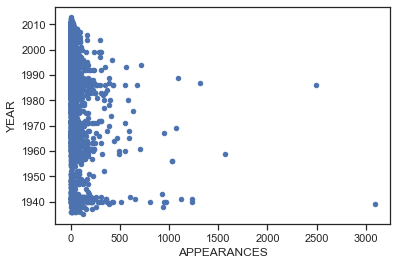

In [35]:
data_clast.reset_index().plot.scatter(x = 'APPEARANCES', y = 'YEAR')

## MeanShift

In [36]:
%time 
result_MeanShift = MeanShift(bandwidth=None).fit_predict(data_clast)
result_MeanShift

Wall time: 0 ns


array([15, 16, 17, ...,  0,  0,  0], dtype=int64)

In [37]:
silhouette_score(data_clast,result_MeanShift)

0.7438434887140527

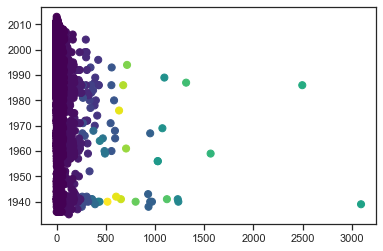

In [38]:
plt.scatter(data_clast.iloc[:, 0], data_clast.iloc[:, 1], c=result_MeanShift, s=50, cmap='viridis')

## DBSCAN

In [39]:
%time 
result_DBSCAN = DBSCAN(eps=3, min_samples=3).fit_predict(data_clast)
result_DBSCAN

Wall time: 0 ns


array([-1, -1, -1, ..., 39, 39, 39], dtype=int64)

In [40]:
silhouette_score(data_clast,result_DBSCAN)

0.33943676903791165

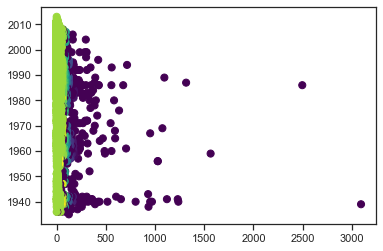

In [41]:
plt.scatter(data_clast.iloc[:, 0], data_clast.iloc[:, 1], c=result_DBSCAN, s=50, cmap='viridis')

Для данных гиперпараметров подешел алгоритм MeanShift